<a href="https://colab.research.google.com/github/Jdmolano2020/TesisNer/blob/main/DatesetTokenClasificationV02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.7 MB/s eta 0:00:00


In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=72cfb4832dfe5e2ce110ea44fb3953bb4f4ba68d7e29a40c23270606c05632cb
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/'
#%cd '/content/drive/MyDrive'


/content/drive/MyDrive/Colab Notebooks


In [ ]:
from datasets import load_dataset

In [ ]:
from PIL import Image
import joblib
import pickle

In [ ]:
import transformers

print(transformers.__version__)

4.30.2


In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ds = load_dataset('datasetsroieV03.py')
print(ds)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset datasetsroie_v03 downloaded and prepared to /root/.cache/huggingface/datasets/datasetsroie_v03/sroie/1.0.0/afb4a263a161d4629c376786a6d73b4df4fa339a92979cbee9f4d00f73d6af76. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 626
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 347
    })
})


In [ ]:
print(ds["train"][0])
#raw_datasets["train"][0]["tokens"]

{'id': '0', 'tokens': ['tan', 'woon', 'yann', 'BOOK', 'TA', '_K', '(TAMAN', 'DAYA)', 'SDN', 'BHD', '789417-W', 'NO.5:', '55,57', '&', '59,', 'JALAN', 'SAGU', '18,', 'TAMAN', 'DAYA,', '81100', 'JOHOR', 'BAHRU', 'JOHOR.', 'Document', 'No', ':', 'TD01167104', 'Date', ':', '25/12/2018', '8:13:39', 'PM', 'Cashier', ':', 'MANIS', 'Member', ':', 'CASH', 'BILL', 'CODE/DESC', 'PRICE', 'Disc', 'AMOUNT', 'QTY', 'RM', 'RM', '9556939040118', 'KF', 'MODELLING', 'CLAY', 'KIDDY', 'FISH', '1', 'PC', '9.000', '0,00', '9,00', 'Total', ':', '9.00', 'Rour', 'ding', 'Adjustment', ':', '0,00', 'Round', 'd', 'Total', '(RM):', '9.00', 'Cash', '10.00', 'CHANGE', '1.00', '9:00', 'GOODS', 'SOLD', 'ARE', 'NOT', 'RETURNABLE', 'OR', 'EXCHANGEABLE', 'THANK', 'YOU', 'PLEASE', 'COME', 'AGAIN', '!'], 'bboxes': [[157, 29, 280, 58], [293, 30, 503, 60], [518, 32, 697, 61], [151, 92, 276, 111], [282, 91, 332, 111], [339, 91, 384, 111], [390, 90, 565, 111], [572, 90, 708, 111], [714, 90, 807, 110], [814, 91, 909, 110], [447,

['tan', 'chay', 'yee', 'ABC', 'HO', 'TRADING', 'No.2&4,', 'JALAN', 'HARMONI', '3/2,', 'TAMAN', 'DESA', 'HARMONI.', '81100', 'JOHOR', 'BAHRU.JOHOR', '07-355', '2616', 'Cash', 'Bill', ':', '01-143008', 'Date', '09/01/2019', '8:01:11', 'PM', 'Cashier', ':', '01', 'Description', 'Qty', 'Price', 'Amount', 'RM', 'RM', 'Plastic', '2', '15.50', '31.00', 'Total', ':', '31.00', 'Total', 'Amount:', '31.00', 'Cash', 'Received', ':', '101.00', 'Change', ':', '70.00', '^Goods', 'Sold', 'are', 'non-refundable', '***', 'Thank', 'You', '***', '***', 'Please', 'Come', 'Again', '***', '31-00']
[0, 0, 0, 1, 2, 2, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


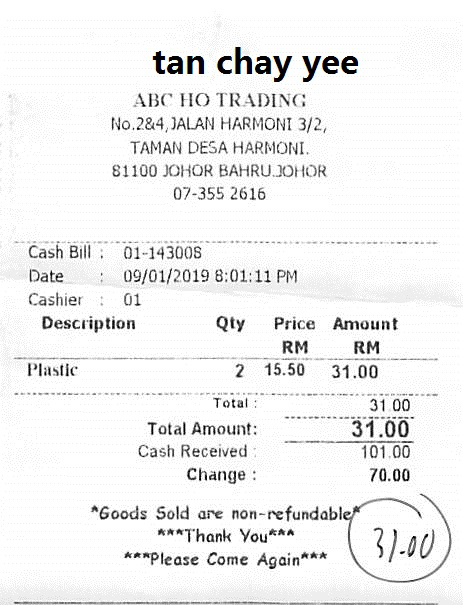

In [ ]:
print(ds["train"][5]["tokens"])
print(ds["train"][5]["ner_tags"])
image_path_re=ds["train"][5]["image_path"]
image = Image.open(image_path_re)
image.show()

In [ ]:
print(ds["test"][0])

{'id': '0', 'tokens': ['tan', 'chay', 'yee', '***', 'COPY', '***', 'OJC', 'MARKETING', 'SDN', 'BHD', 'ROC', 'NO:', '538358-H', 'NO', '2', '&', '4,', 'JALAN', 'BAYU', '4,', 'BANDAR', 'SERI', 'ALAM,', '81750', 'MASAI,', 'JOHOR', 'Tel:07-388', '2218', 'Fax:07-388', '8218', 'Email:', 'ng@ojcgroup.com', 'TAX', 'INVOICE', 'Invoice', 'No', ':', 'PEGIV-1030765', 'Date', ':', '15/01/2019', '11:05:16', 'AM', 'Cashier', ':', 'NG', 'CHUAN', 'MIN', 'Sales', 'Persor', ':', 'FATIN', 'Bill', 'To', ':', 'THE', 'PEAK', 'QUARRY', 'WORKS', 'Address', 'Description', 'Qty', 'Price', 'Amount', '000000111', '1', '193.00', '193.00', 'SR', 'KINGS', 'SAFETY', 'SHOES', 'KWD', '805', 'Qty:', '1', 'Total', 'Exclude', 'GST:', '193.00', 'Total', 'GST', '@6%:', '0.00', 'Total', 'Inclusive', 'GST:', '193.00', 'Round', 'Amt:', '0.00', 'TOTAL:', '193.00', 'VISA', 'CARD', '193,00', 'xxxxxxxxxxxxxxxx4318', 'Approval', 'Code:000', '93.00', 'Goods', 'Sold', 'Are', 'Not', 'Returnable', '&', 'Refundable', '****', 'Thank', 'You

['SIN', 'LIANHAP', 'SON', 'BHD', 'LOT', '13,', 'JALAN', 'SIN', 'LIANHAP', 'SON', 'BHD', 'LOT', '13,', 'JALAN', 'IPOH,', 'KG', 'BATU', '30', ',', 'ULU', 'YAM', 'LAMA', '44300', 'BTG', 'KALI,', 'SELANGOR.', 'TEL:', '03-60752222(HUNTING', 'LINE)', 'FAX:', '03-60752572', '(', 'Company', 'Reg', 'No:', '284922-0', ')', '(GST', 'Reg', 'No:', '001610833920)', 'TAX', 'INVOICE', 'CASH', 'CUSTOMER', 'Invoice', 'No.', ':', ':', 'H0003939', 'Date', ':', ':', '05/02/2018', 'Cashier#:', 'RM', 'Code', 'PPD', '4MM', 'DENLIME', '1.887', 'SR', '1.000', 'PC', 'x', '2.00', '6023#', 'GARDEN', '5.000', 'SR', '1.000', 'PC', '5.30', 'Subtotal', ':', '7.30', "Tuta'", 'Sales', 'Erabiny', 'GST', ':', '6.69', 'Total', 'Sales', 'Inclusive', 'of', 'GST:', '7.30', 'tounding', 'Adjustment', ':', '0.00', 'Payment', ':', '7.30', 'Change', 'Due', ':', '0.00', 'Total', 'Item(s)', ':', '2', 'LIAN', 'GST', 'Summary', 'Tax', 'SR', '@6', '6.89', '0.41', '********', 'THANK', 'YOU]', '*********', '****', 'PLEASE', 'COME', 'AGAI

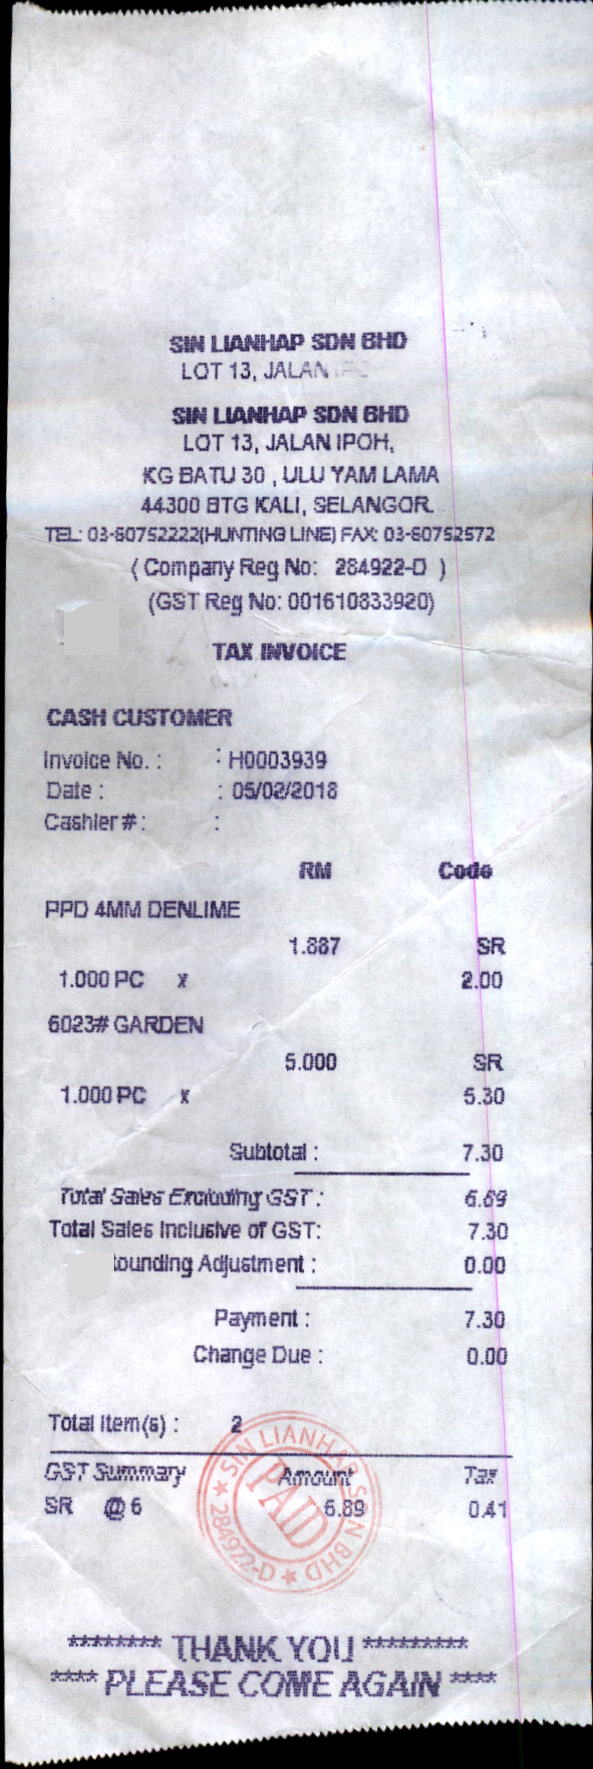

In [ ]:
print(ds["test"][5]["tokens"])
print(ds["test"][5]["ner_tags"])
image_path_re=ds["test"][5]["image_path"]
image = Image.open(image_path_re)
image.show()

In [ ]:
task = "ner" # Should be one of "ner", "pos" or "chunk"
model_checkpoint = "distilbert-base-uncased"
batch_size = 24

In [ ]:
label_list = ds["train"].features[f"{task}_tags"].feature.names
label_list

['O',
 'B-COMPANY',
 'I-COMPANY',
 'B-DATE',
 'I-DATE',
 'B-ADDRESS',
 'I-ADDRESS',
 'B-TOTAL',
 'I-TOTAL']

In [ ]:
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
        elif isinstance(typ, Sequence) and isinstance(typ.feature, ClassLabel):
            df[column] = df[column].transform(lambda x: [typ.feature.names[i] for i in x])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(ds["train"])

,id,tokens,bboxes,ner_tags,image_path
0,401,"[MR., D.I.Y., (KUCHAI), SDN, BHD, Co-REG:750441-W, LOT, 1851-A, &, 1851-B,, JALAN, KPB, 6,, KAWASAN, PERINDUSTRIAN, BALAKONG,, 43300, SERI, KEMBANGAN,, SELANGOR, (GST, ID, No, :000473792512), (KEPONG), -TAX, INVOICE-, STORAGE, BOX, 70581, *S, UE21-31/2/, -, 12, 6936136217897, 1, ×, 12.50, 12.50, Item(s), :, 1, Qty, (s), :, 1, TOTAL, INCL., GST@6%, RM, 12.50, CASH, RM, 15.00, CHANGE, RM, 2.50, GST, @6%, included, in, total, RM, 0.71, 22-04-16, 13:13, SHO1, B003, T1, R000406157, OPERATOR, KPOC, -, BUDHA, PRATAP, SING, EXCHANGE, ARE, ALLOWED, WITHIN, 3, DAY, WITH, RECEIPT., STRICTLY, NO, CASH, REFUND.]","[[206, 176, 274, 200], [283, 176, 426, 200], [436, 176, 614, 200], [623, 176, 699, 200], [708, 175, 782, 200], [334, 204, 654, 227], [140, 233, 220, 254], [228, 233, 365, 253], [373, 233, 411, 253], [418, 233, 578, 254], [585, 233, 703, 255], [709, 234, 791, 256], [797, 234, 844, 256], [161, 260, 323, 281], [331, 260, 620, 282], [628, 260, 817, 282], [185, 288, 301, 308], [308, 288, 408, 308], [416, 288, 639, 309], [647, 288, 826, 309], [229, 316, 324, 338], [332, 316, 382, 337], [390, 316, 450, 337], [458, 316, 760, 338], [418, 344, 588, 366], [355, 371, 453, 391], [460, 371, 631, 391], [77, 426, 239, 447], [246, 426, 332, 447], [359, 426, 462, 447], [885, 428, 925, 447], [82, 452, 297, 477], [306, 452, 344, 476], [353, 452, 404, 476], [82, 481, 359, 503], [546, 482, 574, 505], [583, 482, 618, 505], [627, 482, 754, 505], [772, 482, 887, 505], [79, 538, 238, 560], [246, 538, 283, 560], [290, 538, 315, 560], [712, 538, 765, 561], [773, 539, 849, 561], [858, 539, 895, 561], [904, 539, 927, 561], [78, 592, 199, 613], [206, 593, 324, 613], [331, 592, 465, 613], [757, 594, 810, 613], [817, 594, 926, 613], [82, 621, 166, 640], [756, 621, 810, 641], [817, 622, 926, 641], [79, 647, 212, 667], [777, 647, 829, 670], [838, 647, 927, 670], [81, 701, 150, 725], [159, 701, 236, 725], [245, 701, 426, 725], [436, 701, 487, 725], [496, 701, 611, 724], [711, 703, 766, 723], [774, 703, 865, 724], [77, 757, 260, 778], [266, 757, 386, 777], [394, 757, 490, 777], [500, 757, 594, 777], [648, 757, 698, 778], [707, 757, 927, 777], [78, 784, 259, 805], [266, 784, 365, 805], [372, 784, 407, 805], [415, 784, 534, 805], [542, 784, 683, 805], [691, 785, 780, 805], [208, 838, 382, 862], [391, 838, 466, 862], [476, 838, 635, 861], [644, 838, 780, 862], [286, 867, 322, 887], [328, 867, 406, 887], [413, 867, 514, 887], [522, 867, 692, 887], [248, 895, 426, 916], [434, 895, 487, 915], [495, 895, 595, 915], [603, 895, 759, 916]]","[B-COMPANY, I-COMPANY, I-COMPANY, I-COMPANY, I-COMPANY, O, B-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, I-ADDRESS, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-TOTAL, I-TOTAL, O, O, O, O, O, O, O, O, O, O, O, O, O, B-DATE, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",/root/.cache/huggingface/datasets/downloads/extracted/d18b823af5e7c53aa3aa15ef6850a889c56c2682d983b971e2a126d42c386877/sroie/train/images/X51006620176.jpg
1,270,"[WELKEN, SERVICE, ELKEN, SERVICE, SON, BHD, (310184-X), No, 2-1, Jalan, 3/137B, Batu, 5, Jalan, Kelang, Lama, 58000, Kuala, Lumpur, Tel:, 603-79859377, Fax, no:, 03-79807585, Email, :, elkenservice@elken.com.my, GST, Reg, No, :, 000154042368, TAX, INVOICE, DATE, :, 10, OCT, 2017, TUE, S/O, NO, :, SS3511032318, JOB, TYPE, :, MAINTENANCE, INVOICE, NO, :, ESS447-004439, BILL, TO, ., WONG, PEI, HAR, ADDRESS, :, 2920/1,, JALAN, JINJANG, INDAH, 1,, JINJANG, UTARA,, 52000, KEPONG,, KUALA, LUMPUR., TEL, :, 0122536936, TYPE, OF, UNIT, DESCRIPTION, SUPPLY, PRICE, QTY, TOTAL, RM, RM, VALUE, PACK, A, -, BP, SER, SR, 235.85, 235.85, -CARBON, FILTER, -, BP, SERIES, -SEDIMENT, FILTER, ...]","[[398, 20, 709, 38], [439, 40, 714, 58], [203, 71, 303, 83], [312, 71, 456, 83], [464, 71, 530, 83], [537, 71, 608, 84], [616, 72, 807

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
import transformers
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

In [ ]:
tokenizer("Hello, this is one sentence!")

{'input_ids': [101, 7592, 1010, 2023, 2003, 2028, 6251, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer(["Hello", ",", "this", "is", "one", "sentence", "split", "into", "words", "."], is_split_into_words=True)

{'input_ids': [101, 7592, 1010, 2023, 2003, 2028, 6251, 3975, 2046, 2616, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
example = ds["test"][1]
print(example["tokens"])

['tan', 'chay', 'yee', 'OJC', 'MARKETING', 'SDN', 'BHD', 'ROC', 'NO:', '538358-H', 'NO', '2', '&', '4,', 'JALAN', 'BAYU', '4,', 'BANDAR', 'SERI', 'ALAM,', '81750', 'MASAI,', 'JOHOR', 'Tel:07-388', '2218', 'Fax:07-388', '8218', 'Email:', 'ng@ojcgroup.com', 'Cash', 'Bill', 'Invoice', 'No', ':', 'PEGIV-1030531', 'Date', '02/01/2019', '2:47:14', 'PM', 'Cashier', ':', 'RHYS', 'TAN', 'Sales', 'Persor', ':', 'FATIN', 'Description', 'Qty', 'Price', 'Amount', '000000111', '1', '170.00', '170.00', 'KINGS', 'SAFETY', 'P004', 'SHOES', 'KWD', '805', 'Qty:', '1', 'Total', 'Item', 'Discount:', '0.00', 'Total', 'Amount:', '170.00', 'Round', 'Amt:', '0.00', 'TOTAL:', '170.00', 'VISA', 'CARD', '170.00', 'xxxxxxxxxxxx4318', 'Approval', 'Code:', '123', '170.00', 'Goods', 'Sold', 'Are', 'Not', 'Returnable', '&', 'Refundable', '****', 'Thank', 'You.', 'Please', 'Come', 'Again', '.****']


In [ ]:
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
print(tokens)

['[CLS]', 'tan', 'cha', '##y', 'ye', '##e', 'o', '##j', '##c', 'marketing', 'sd', '##n', 'b', '##hd', 'roc', 'no', ':', '53', '##8', '##35', '##8', '-', 'h', 'no', '2', '&', '4', ',', 'jalan', 'bay', '##u', '4', ',', 'banda', '##r', 'ser', '##i', 'alam', ',', '81', '##75', '##0', 'mas', '##ai', ',', 'johor', 'tel', ':', '07', '-', '38', '##8', '221', '##8', 'fa', '##x', ':', '07', '-', '38', '##8', '82', '##18', 'email', ':', 'ng', '@', 'o', '##j', '##c', '##group', '.', 'com', 'cash', 'bill', 'in', '##vo', '##ice', 'no', ':', 'peg', '##iv', '-', '103', '##0', '##53', '##1', 'date', '02', '/', '01', '/', '2019', '2', ':', '47', ':', '14', 'pm', 'cash', '##ier', ':', 'rhys', 'tan', 'sales', 'per', '##sor', ':', 'fat', '##in', 'description', 'q', '##ty', 'price', 'amount', '000', '##00', '##01', '##11', '1', '170', '.', '00', '170', '.', '00', 'kings', 'safety', 'p', '##00', '##4', 'shoes', 'kw', '##d', '80', '##5', 'q', '##ty', ':', '1', 'total', 'item', 'discount', ':', '0', '.', '00',

In [ ]:
len(example[f"{task}_tags"]), len(tokenized_input["input_ids"])

(97, 211)

In [ ]:
print(tokenized_input.word_ids())

[None, 0, 1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9, 9, 9, 9, 9, 10, 11, 12, 13, 13, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 21, 21, 22, 23, 23, 23, 23, 23, 23, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 30, 31, 31, 31, 32, 33, 34, 34, 34, 34, 34, 34, 34, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 39, 39, 40, 41, 42, 43, 44, 44, 45, 46, 46, 47, 48, 48, 49, 50, 51, 51, 51, 51, 52, 53, 53, 53, 54, 54, 54, 55, 56, 57, 57, 57, 58, 59, 59, 60, 60, 61, 61, 61, 62, 63, 64, 65, 65, 66, 66, 66, 67, 68, 68, 69, 69, 69, 70, 71, 71, 71, 72, 72, 72, 73, 73, 74, 74, 74, 75, 76, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 79, 80, 80, 81, 82, 82, 82, 83, 84, 85, 86, 87, 87, 88, 89, 89, 89, 90, 90, 90, 90, 91, 92, 92, 93, 94, 95, 96, 96, 96, 96, 96, None]


In [ ]:
word_ids = tokenized_input.word_ids()
aligned_labels = [-100 if i is None else example[f"{task}_tags"][i] for i in word_ids]
print(len(aligned_labels), len(tokenized_input["input_ids"]))

211 211


In [ ]:
print(aligned_labels)
print(tokenized_input["input_ids"])

[-100, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]
[101, 9092, 15775, 2100, 6300, 2063, 1051, 3501, 2278, 5821, 17371, 2078, 1038, 14945, 21326, 2053, 1024, 5187, 2620, 19481, 2620, 1011, 1044, 2053, 1016, 1004, 1018, 1010, 28410, 3016, 2226, 1018, 1010, 24112, 2099, 14262, 2072, 26234, 1010, 6282, 23352, 2692, 16137, 4886, 1010, 25268, 10093, 1024, 5718, 1011, 4229, 2620, 19594, 2620, 6904, 2595, 1024, 5718

In [ ]:
label_all_tokens = True

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"{task}_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            # Los tokens especiales tienen una identificación de palabra que es None. Ponemos la etiqueta a -100 para que sean automáticamente
            # ignorado en la función de pérdida.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            #Establecemos la etiqueta para el primer token de cada palabra.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            # Para los otros tokens en una palabra, establecemos la etiqueta en la etiqueta actual o -100, dependiendo de
            # la bandera label_all_tokens.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
tokenize_and_align_labels(ds['train'][:5])

{'input_ids': [[101, 9092, 15854, 2078, 13619, 2078, 2338, 11937, 1035, 1047, 1006, 17214, 2319, 2154, 2050, 1007, 17371, 2078, 1038, 14945, 6275, 2683, 23632, 2581, 1011, 1059, 2053, 1012, 1019, 1024, 4583, 1010, 5401, 1004, 5354, 1010, 28410, 7842, 12193, 2324, 1010, 17214, 2319, 2154, 2050, 1010, 6282, 18613, 25268, 8670, 8093, 2226, 25268, 1012, 6254, 2053, 1024, 14595, 24096, 16048, 2581, 10790, 2549, 3058, 1024, 2423, 1013, 2260, 1013, 2760, 1022, 1024, 2410, 1024, 4464, 7610, 5356, 3771, 1024, 23624, 2015, 2266, 1024, 5356, 3021, 3642, 1013, 4078, 2278, 3976, 5860, 3815, 1053, 3723, 28549, 28549, 5345, 26976, 2683, 23499, 2692, 12740, 14526, 2620, 1047, 2546, 19518, 5726, 25358, 2100, 3869, 1015, 7473, 1023, 1012, 2199, 1014, 1010, 4002, 1023, 1010, 4002, 2561, 1024, 1023, 1012, 4002, 20996, 3126, 22033, 19037, 1024, 1014, 1010, 4002, 2461, 1040, 2561, 1006, 28549, 1007, 1024, 1023, 1012, 4002, 5356, 2184, 1012, 4002, 2689, 1015, 1012, 4002, 1023, 1024, 4002, 5350, 2853, 2024, 2

In [ ]:
tokenized_datasets = ds.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/626 [00:00<?, ? examples/s]

Map:   0%|          | 0/347 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(label_list))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream

In [ ]:
num_epochs=160

In [ ]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-{task}",
    evaluation_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=True,
)

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
metric = load_metric("seqeval")

<ipython-input-43-e20ba34f8cc7>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [ ]:
labels = [label_list[i] for i in example[f"{task}_tags"]]
metric.compute(predictions=[labels], references=[labels])

{'ADDRESS': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'COMPANY': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'DATE': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'TOTAL': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [ ]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Cloning https://huggingface.co/Jmolano/distilbert-base-uncased-finetuned-ner into local empty directory.


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.169800,0.650876,0.402115,0.497112,0.957706
2,No log,0.092543,0.757556,0.579439,0.656633,0.973124
3,No log,0.067010,0.767667,0.761436,0.764539,0.978898
4,No log,0.062654,0.862682,0.727742,0.789488,0.981757
5,No log,0.057584,0.816322,0.843827,0.829846,0.983675
6,No log,0.057224,0.825259,0.863010,0.843712,0.985002
7,No log,0.060298,0.822238,0.865716,0.843417,0.984923
8,No log,0.060955,0.821669,0.869159,0.844747,0.985218
9,No log,0.062743,0.843230,0.873094,0.857902,0.986125
10,No log,0.061688,0.845252,0.869159,0.857039,0.986409


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.169800,0.650876,0.402115,0.497112,0.957706
2,No log,0.092543,0.757556,0.579439,0.656633,0.973124
3,No log,0.067010,0.767667,0.761436,0.764539,0.978898
4,No log,0.062654,0.862682,0.727742,0.789488,0.981757
5,No log,0.057584,0.816322,0.843827,0.829846,0.983675
6,No log,0.057224,0.825259,0.863010,0.843712,0.985002
7,No log,0.060298,0.822238,0.865716,0.843417,0.984923
8,No log,0.060955,0.821669,0.869159,0.844747,0.985218
9,No log,0.062743,0.843230,0.873094,0.857902,0.986125
10,No log,0.061688,0.845252,0.869159,0.857039,0.986409


TrainOutput(global_step=4320, training_loss=0.006655554507893545, metrics={'train_runtime': 4888.7827, 'train_samples_per_second': 20.488, 'train_steps_per_second': 0.884, 'total_flos': 1.0748845004397444e+16, 'train_loss': 0.006655554507893545, 'epoch': 160.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.09331503510475159,
 'eval_precision': 0.8699324324324325,
 'eval_recall': 0.8866207575012297,
 'eval_f1': 0.8781973203410476,
 'eval_accuracy': 0.9879403255998639,
 'eval_runtime': 7.7921,
 'eval_samples_per_second': 44.532,
 'eval_steps_per_second': 1.925,
 'epoch': 160.0}

In [ ]:
predictions, labels, _ = trainer.predict(tokenized_datasets["test"])
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results

{'ADDRESS': {'precision': 0.7672413793103449,
  'recall': 0.7739130434782608,
  'f1': 0.7705627705627706,
  'number': 690},
 'COMPANY': {'precision': 0.8591352859135286,
  'recall': 0.8992700729927007,
  'f1': 0.8787446504992867,
  'number': 685},
 'DATE': {'precision': 0.9880503144654088,
  'recall': 0.9769900497512438,
  'f1': 0.9824890556597875,
  'number': 1608},
 'TOTAL': {'precision': 0.7747589833479404,
  'recall': 0.8162511542012927,
  'f1': 0.7949640287769784,
  'number': 1083},
 'overall_precision': 0.8699324324324325,
 'overall_recall': 0.8866207575012297,
 'overall_f1': 0.8781973203410476,
 'overall_accuracy': 0.9879403255998639}

In [ ]:
prediction= trainer.predict(tokenized_datasets["test"])

In [ ]:
print(prediction)
print('Tamaño')
print(prediction.predictions.shape, prediction.label_ids.shape)

PredictionOutput(predictions=array([[[ 4.2764080e-01,  7.7582488e+00, -1.5536064e+00, ...,
         -1.5890070e+00, -7.6217830e-01, -1.1659003e+00],
        [ 1.0660759e+01, -1.9828944e+00, -1.9690870e+00, ...,
         -1.8879055e+00, -1.4760072e+00, -2.3022034e+00],
        [ 1.0579820e+01, -2.3248434e+00, -1.3453522e+00, ...,
         -1.8539507e+00, -1.9362934e+00, -2.2326727e+00],
        ...,
        [-1.0000000e+02, -1.0000000e+02, -1.0000000e+02, ...,
         -1.0000000e+02, -1.0000000e+02, -1.0000000e+02],
        [-1.0000000e+02, -1.0000000e+02, -1.0000000e+02, ...,
         -1.0000000e+02, -1.0000000e+02, -1.0000000e+02],
        [-1.0000000e+02, -1.0000000e+02, -1.0000000e+02, ...,
         -1.0000000e+02, -1.0000000e+02, -1.0000000e+02]],

       [[ 1.5852028e-01,  7.7613049e+00, -1.2887535e+00, ...,
         -1.4448594e+00, -7.2744185e-01, -1.3064642e+00],
        [ 1.0243487e+01, -2.1581111e+00, -1.7738098e+00, ...,
         -1.5692695e+00, -1.4841731e+00, -2.3528748e+0

In [ ]:
print(prediction[1])

In [ ]:
print(prediction.label_ids[1])

[-100    0    0    0    0    0    1    1    1    2    2    2    2    2
    0    0    0    0    0    0    0    0    0    5    6    6    6    6
    6    6    6    6    6    6    6    6    6    6    6    6    6    6
    6    6    6    6    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    3    3    3    3    3    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    7    7    7    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
print(label_list)
predict=prediction.label_ids[1]
prediction_label=[]
for label_id in predict:
  if label_id == -100:
    prediction_label.append("None")
  else:
    prediction_label.append(label_list[label_id])

print(prediction_label)

['O', 'B-COMPANY', 'I-COMPANY', 'B-DATE', 'I-DATE', 'B-ADDRESS', 'I-ADDRESS', 'B-TOTAL', 'I-TOTAL']
['None', 'O', 'O', 'O', 'O', 'O', 'B-COMPANY', 'B-COMPANY', 'B-COMPANY', 'I-COMPANY', 'I-COMPANY', 'I-COMPANY', 'I-COMPANY', 'I-COMPANY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'I-ADDRESS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'B-DATE', 'B-DATE', 'B-DATE', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-TOTAL', 'B-TOTAL', '

In [ ]:
print(tokenized_datasets["test"][1])

{'id': '1', 'tokens': ['tan', 'chay', 'yee', 'OJC', 'MARKETING', 'SDN', 'BHD', 'ROC', 'NO:', '538358-H', 'NO', '2', '&', '4,', 'JALAN', 'BAYU', '4,', 'BANDAR', 'SERI', 'ALAM,', '81750', 'MASAI,', 'JOHOR', 'Tel:07-388', '2218', 'Fax:07-388', '8218', 'Email:', 'ng@ojcgroup.com', 'Cash', 'Bill', 'Invoice', 'No', ':', 'PEGIV-1030531', 'Date', '02/01/2019', '2:47:14', 'PM', 'Cashier', ':', 'RHYS', 'TAN', 'Sales', 'Persor', ':', 'FATIN', 'Description', 'Qty', 'Price', 'Amount', '000000111', '1', '170.00', '170.00', 'KINGS', 'SAFETY', 'P004', 'SHOES', 'KWD', '805', 'Qty:', '1', 'Total', 'Item', 'Discount:', '0.00', 'Total', 'Amount:', '170.00', 'Round', 'Amt:', '0.00', 'TOTAL:', '170.00', 'VISA', 'CARD', '170.00', 'xxxxxxxxxxxx4318', 'Approval', 'Code:', '123', '170.00', 'Goods', 'Sold', 'Are', 'Not', 'Returnable', '&', 'Refundable', '****', 'Thank', 'You.', 'Please', 'Come', 'Again', '.****'], 'bboxes': [[252, 73, 373, 115], [384, 73, 561, 118], [574, 73, 704, 118], [133, 155, 209, 177], [21

['tan', 'chay', 'yee', 'OJC', 'MARKETING', 'SDN', 'BHD', 'ROC', 'NO:', '538358-H', 'NO', '2', '&', '4,', 'JALAN', 'BAYU', '4,', 'BANDAR', 'SERI', 'ALAM,', '81750', 'MASAI,', 'JOHOR', 'Tel:07-388', '2218', 'Fax:07-388', '8218', 'Email:', 'ng@ojcgroup.com', 'Cash', 'Bill', 'Invoice', 'No', ':', 'PEGIV-1030531', 'Date', '02/01/2019', '2:47:14', 'PM', 'Cashier', ':', 'RHYS', 'TAN', 'Sales', 'Persor', ':', 'FATIN', 'Description', 'Qty', 'Price', 'Amount', '000000111', '1', '170.00', '170.00', 'KINGS', 'SAFETY', 'P004', 'SHOES', 'KWD', '805', 'Qty:', '1', 'Total', 'Item', 'Discount:', '0.00', 'Total', 'Amount:', '170.00', 'Round', 'Amt:', '0.00', 'TOTAL:', '170.00', 'VISA', 'CARD', '170.00', 'xxxxxxxxxxxx4318', 'Approval', 'Code:', '123', '170.00', 'Goods', 'Sold', 'Are', 'Not', 'Returnable', '&', 'Refundable', '****', 'Thank', 'You.', 'Please', 'Come', 'Again', '.****']
[-100, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

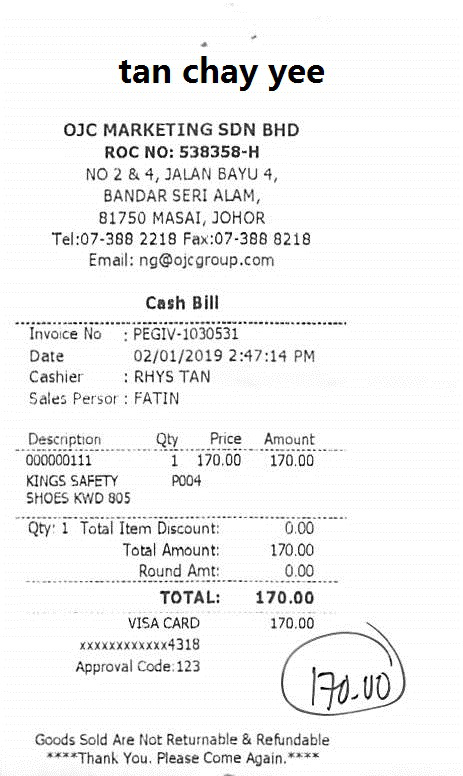

In [ ]:
print(tokenized_datasets["test"][1]["tokens"])
print(tokenized_datasets["test"][1]["labels"])
print(prediction_label)
image_path_re=ds["test"][1]["image_path"]
image = Image.open(image_path_re)
image.show()

In [ ]:
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

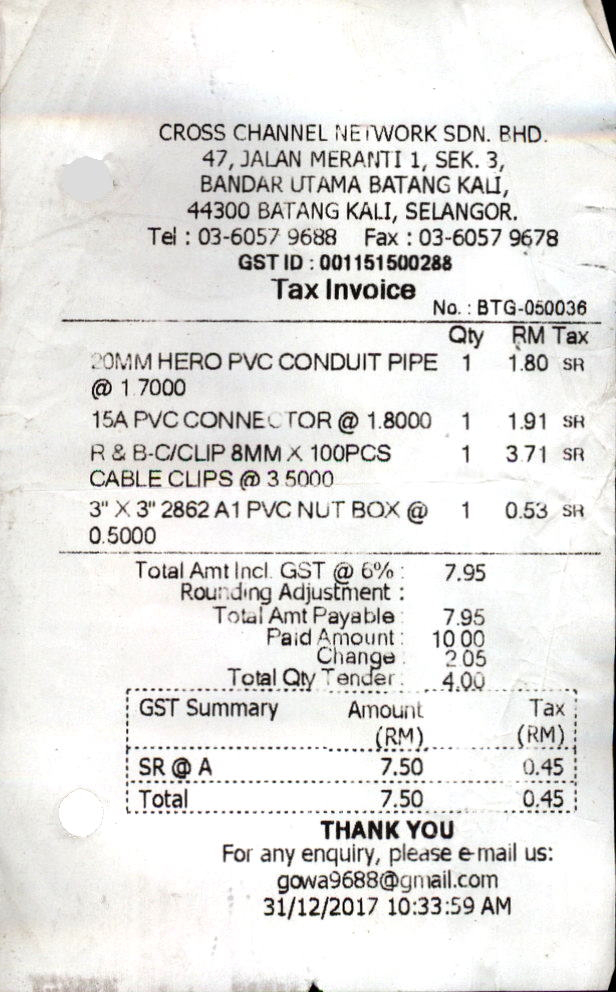

tokens: ['[CLS]', 'cross', 'channel', 'network', 'sd', '##n', '.', 'b', '##hd', '.', '47', ',', 'jalan', 'mer', '##ant', '##i', '1', ',', 'se', '##k', '.', '3', ',', 'banda', '##r', 'uta', '##ma', 'bat', '##ang', 'kali', ',', '44', '##30', '##0', 'bat', '##ang', 'kali', ',', 'selangor', '.', 'tel', ':', '03', '-', '60', '##57', '96', '##8', '##8', 'fa', '##x', ':', '03', '-', '60', '##57', '96', '##7', '##8', 'gs', '##t', 'id', ':', '001', '##15', '##15', '##00', '##28', '##8', 'tax', 'in', '##vo', '##ice', 'no', '.', ':', 'bt', '##g', '-', '050', '##0', '##36', 'q', '##ty', 'rm', 'tax', '20', '##mm', 'hero', 'pv', '##c', 'con', '##du', '##it', 'pipe', '1', '1', '.', '80', 'sr', '@', '1', '.', '700', '##0', '15', '##a', 'pv', '##c', 'connector', '@', '1', '.', '800', '##0', '1', '1', '.', '91', 'sr', 'r', '&', 'b', '-', 'c', '/', 'clip', '8', '##mm', 'x', '100', '##pc', '##s', '1', '3', '.', '71', 'sr', 'cable', 'clips', '@', '3', '5000', '3', '"', 'x', '3', '"', '286', '##2', 'a1', 'p

In [ ]:
Id = 7
tokens = tokenizer.convert_ids_to_tokens(tokenized_datasets["test"][Id]["input_ids"])
image_path_re = tokenized_datasets["test"][Id]["image_path"]
image = Image.open(image_path_re)
image.show()
print('tokens:',tokens)
print('predictions:',true_predictions[Id])

In [ ]:
print(results)

{'ADDRESS': {'precision': 0.7672413793103449, 'recall': 0.7739130434782608, 'f1': 0.7705627705627706, 'number': 690}, 'COMPANY': {'precision': 0.8591352859135286, 'recall': 0.8992700729927007, 'f1': 0.8787446504992867, 'number': 685}, 'DATE': {'precision': 0.9880503144654088, 'recall': 0.9769900497512438, 'f1': 0.9824890556597875, 'number': 1608}, 'TOTAL': {'precision': 0.7747589833479404, 'recall': 0.8162511542012927, 'f1': 0.7949640287769784, 'number': 1083}, 'overall_precision': 0.8699324324324325, 'overall_recall': 0.8866207575012297, 'overall_f1': 0.8781973203410476, 'overall_accuracy': 0.9879403255998639}
